In [66]:
from pipeline import Pipeline


In [ ]:
pipeline = Pipeline()

corpus_directory = "storage/corpus"  

#chunking with overlap
print("Sentence Chunking (overlap_size=2):")
sentence_chunks = pipeline.preprocess_corpus(corpus_directory, chunking_strategy='sentence', overlap_size=2)
print(sentence_chunks)

print("\nSentence Chunking (overlap_size=4):")
sentence_chunks = pipeline.preprocess_corpus(corpus_directory, chunking_strategy='sentence', overlap_size=4)
print(sentence_chunks)

# Fixed-length chunking 
print("\nFixed-length Chunking (fixed_length=50, overlap_size=3):")
fixed_length_chunks = pipeline.preprocess_corpus(corpus_directory, chunking_strategy='fixed-length', fixed_length=50, overlap_size=3)
print(fixed_length_chunks)

print("\nFixed-length Chunking (fixed_length=100, overlap_size=2):")
fixed_length_chunks = pipeline.preprocess_corpus(corpus_directory, chunking_strategy='fixed-length', fixed_length=100, overlap_size=2)
print(fixed_length_chunks)

print("\nFixed-length Chunking (fixed_length=150, overlap_size=1):")
fixed_length_chunks = pipeline.preprocess_corpus(corpus_directory, chunking_strategy='fixed-length', fixed_length=150, overlap_size=1)
print(fixed_length_chunks)


Sentence Chunking (overlap_size=2):
[{'filename': 'S08_set3_a1.txt.clean', 'chunk': "John_Adams John Adams, Jr. (October 30,1735 July 4, 1826) was the second President of the United States (1797 1801). He also served as America's first Vice President (1789 1797)."}, {'filename': 'S08_set3_a1.txt.clean', 'chunk': 'He was defeated for re-election in the "Revolution of 1800" by Thomas Jefferson. Adams was also the first President to reside in the newly built White House in Washington, D.C., which was completed in 1800.'}, {'filename': 'S08_set3_a1.txt.clean', 'chunk': 'Adams, a sponsor of the American Revolution in Massachusetts, was a driving force for independence in 1776; Jefferson called him the "Colossus of Independence". He represented the Continental Congress in Europe.'}, {'filename': 'S08_set3_a1.txt.clean', 'chunk': "He was a major negotiator of the eventual peace treaty with Great Britain, and chiefly responsible for obtaining the loans from the Amsterdam money market necessary

config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

c:\Users\shrin\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:139: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\shrin\.cache\huggingface\hub\models--cross-encoder--ms-marco-MiniLM-L-6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

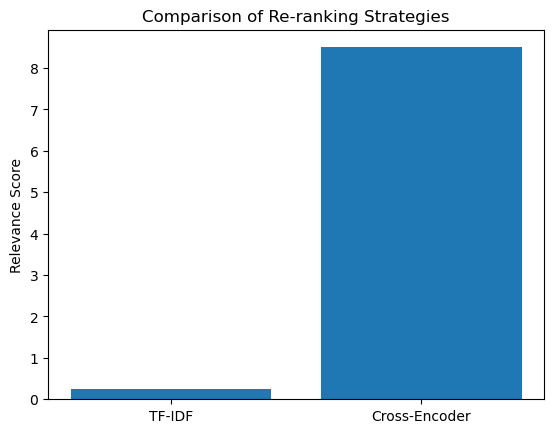

In [ ]:
from modules.retrieval.reranker import Reranker
import matplotlib.pyplot as plt

# Initialize 
reranker = Reranker(type="hybrid")

# Examples
query = "What is the capital of France?"
context = [
    "Paris is the capital of France.",
    "Berlin is the capital of Germany.",
    "London is the capital of the United Kingdom.",
    "The Eiffel Tower is in Paris.",
    "France is a country in Europe."
]

# TF-IDF 
tfidf_ranked_docs, _, tfidf_scores = reranker.tfidf_rerank(query, context)

# cross-encoder 
cross_encoder_ranked_docs, _, cross_encoder_scores = reranker.cross_encoder_rerank(query, context)

# Plot
strategies = ["TF-IDF", "Cross-Encoder"]
scores = [tfidf_scores[0], cross_encoder_scores[0]]

plt.bar(strategies, scores)
plt.ylabel("Relevance Score")
plt.title("Comparison of Re-ranking Strategies")
plt.show()


# Reranker Analysis
## Experiment
Every query was tested against a pre-chucnked corpus, so that the re-rankers were evaluated on their ability to prioritize the most relevant documents
## Results by strategy
1. Cross-Encoder Only: It demonstrated a much higher relevance score than the TF-IDF, suggesting that the Cross-encoder is much better at undersatnding semantic relationships and producing accurate rankings. It uses a transformer-based deep learning model which can explain for this. Therefore, it is best for tasks that are depending on semantic matching. That being said, it is computationally expensive, so in real world applications with large data, that may be a concern.
2. TD-IDF: The limitation is because it focuses primarily on keyword frequency and does not consider semantic meaning, which is why there was a low score. It is better for scenarios where speed and simplicity are more important, but less important in scenarios where semantic matching is key.